In [1]:
import os
import pandas as pd

# Set path to dataset
video_root = r"C:\Users\adita\Downloads\violence-detection-system\archive\Real Life Violence Dataset"  # e.g., "Violence", "NonViolence" folders are inside

# Prepare data
data = []
for label in os.listdir(video_root):
    class_path = os.path.join(video_root, label)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.endswith('.mp4') or filename.endswith('.avi'):
                data.append({'filename': os.path.join(label, filename), 'label': label})

# Save to CSV
df = pd.DataFrame(data)
df.to_csv('labels.csv', index=False)

print(df.head())


                  filename        label
0     NonViolence\NV_1.mp4  NonViolence
1    NonViolence\NV_10.mp4  NonViolence
2   NonViolence\NV_100.mp4  NonViolence
3  NonViolence\NV_1000.mp4  NonViolence
4   NonViolence\NV_101.mp4  NonViolence


In [2]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random


In [3]:
# Load the CSV you just created
df = pd.read_csv('labels.csv')
print(df.head())


                  filename        label
0     NonViolence\NV_1.mp4  NonViolence
1    NonViolence\NV_10.mp4  NonViolence
2   NonViolence\NV_100.mp4  NonViolence
3  NonViolence\NV_1000.mp4  NonViolence
4   NonViolence\NV_101.mp4  NonViolence


C:\Users\adita\AppData\Local\Temp\ipykernel_15304\2348626319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


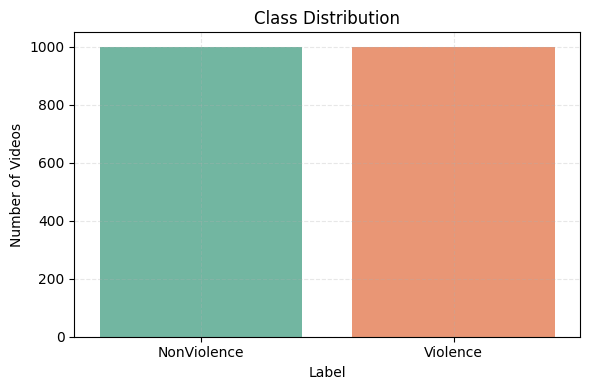

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Videos')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Calculating durations: 100%|██████████| 2000/2000 [02:07<00:00, 15.75it/s]


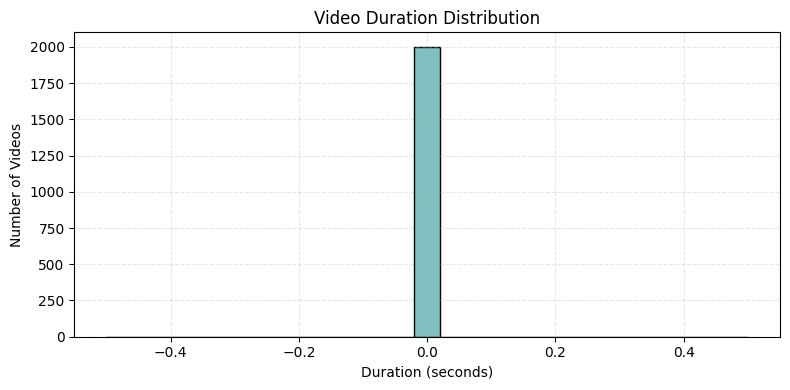

In [7]:
def get_video_duration(filepath):
    cap = cv2.VideoCapture(filepath)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    cap.release()
    if fps > 0:
        return total_frames / fps
    return 0

# Compute durations
video_root = 'dataset'
durations = []
for path in tqdm(df['filename'], desc='Calculating durations'):
    full_path = os.path.join(video_root, path)
    durations.append(get_video_duration(full_path))

df['duration_sec'] = durations

# Plot duration distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['duration_sec'], bins=25, kde=True, color='teal')
plt.title('Video Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Videos')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


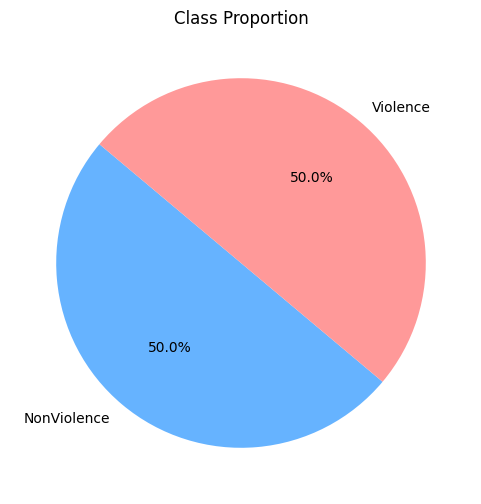

In [10]:
plt.figure(figsize=(6,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Class Proportion')
plt.ylabel('')
plt.show()


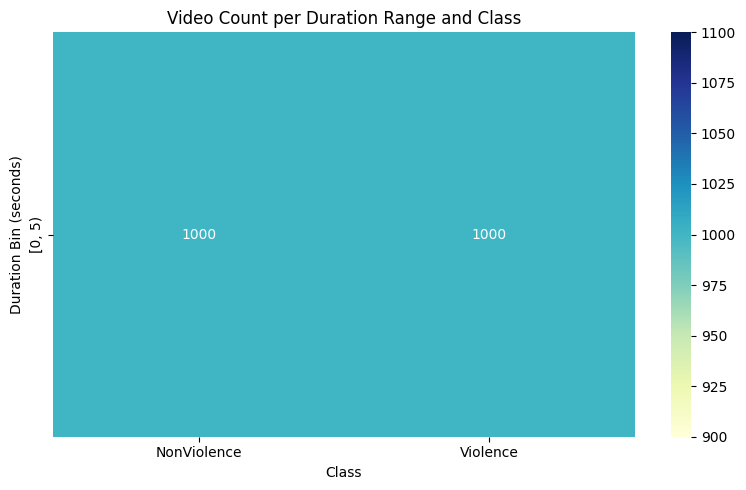

In [13]:
# Create duration bins
df['duration_bin'] = pd.cut(df['duration_sec'], bins=[0, 5, 10, 20, 40, 60, 120, 300], right=False)

# Cross-tab
heatmap_data = pd.crosstab(df['duration_bin'], df['label'])

plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Video Count per Duration Range and Class')
plt.xlabel('Class')
plt.ylabel('Duration Bin (seconds)')
plt.tight_layout()
plt.show()
